# Pandas


{{ badge }}

One of the downsides of NumPy is that it is difficult to work with data that is heterogenous (that is, of mixed data types). Such data is very common, however. Pandas (https://pandas.pydata.org/) is a Python library makes working with such data significantly easier. Similar to NumPy, Pandas is often used to work with tabular data. The two primary data structures are the [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) (one-dimensional arrays) and the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) (two-dimensional arrays, which can be thought of as dictionaries of Series). 

More details on Pandas can be found in the following tutorials. 

* [Quick Start](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
* [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook)
* [Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


### Series

Series are one-dimensional arrays in elements have indexes (essentially labels). They can be created in  a number of ways, including from a Python dictionary. If no indexes are provided when defined, then integer indexes 0, 1, 2, ..., are used. Series can also be given names. 

In [1]:
import pandas as pd
import numpy as np


In [2]:

series1 = pd.Series([10, 20, 30, 10])  # no indexes or name specified
series2 = pd.Series(
    [1, 2, 3, 4.0, 5], index=["first", "second", "third", "fourth", "fifth"], name="s2"
)
series3 = pd.Series({3: "a", "d": 0, "7": 8}, name="s3")  # from a dictionary
series4 = pd.Series(42, range(10), name="s4")  # from a scalar, with indexes

print(series1)
print("-" * 40)

print(series2)
print("-" * 40)

print(series1[2])
print("-" * 40)

print(series3)
print("-" * 40)

print(series4)

0    10
1    20
2    30
3    10
dtype: int64
----------------------------------------
first     1.0
second    2.0
third     3.0
fourth    4.0
fifth     5.0
Name: s2, dtype: float64
----------------------------------------
30
----------------------------------------
3    a
d    0
7    8
Name: s3, dtype: object
----------------------------------------
0    42
1    42
2    42
3    42
4    42
5    42
6    42
7    42
8    42
9    42
Name: s4, dtype: int64


You can examine a series using several builtin properties and methods. 

In [3]:
print(series2.size)
print(series2.shape)
print(series2.dtype)
print(series2.index)

5
(5,)
float64
Index(['first', 'second', 'third', 'fourth', 'fifth'], dtype='object')


## Accessing Elements and  Slicing

Series work much like NumPy ndarrays and can be sliced. 

In [4]:
series = pd.Series({"a": 1, "b": 2, "c": 3})

series["a"] = 10
print(series)

a    10
b     2
c     3
dtype: int64


In [5]:
series = pd.Series(range(100, 1000, 25), index=list(range(100, 136)), name="s")
series[100]  # note we're referencing by label

100

In [6]:
series[[102, 101, 100, 109]]  # note we're referencing by label

102    150
101    125
100    100
109    325
Name: s, dtype: int64

In [7]:
series[10:15]  # note we're referencing by position

110    350
111    375
112    400
113    425
114    450
Name: s, dtype: int64

In [8]:
series[series > 800]  # slicing using a boolean condition

129    825
130    850
131    875
132    900
133    925
134    950
135    975
Name: s, dtype: int64

In [9]:
series > 800  # The condition itself returns a new series

100    False
101    False
102    False
103    False
104    False
105    False
106    False
107    False
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129     True
130     True
131     True
132     True
133     True
134     True
135     True
Name: s, dtype: bool

In [10]:
series.mean()

537.5

In [11]:
series[series < series.mean()]

100    100
101    125
102    150
103    175
104    200
105    225
106    250
107    275
108    300
109    325
110    350
111    375
112    400
113    425
114    450
115    475
116    500
117    525
Name: s, dtype: int64

In [12]:
series == 150

100    False
101    False
102     True
103    False
104    False
105    False
106    False
107    False
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
Name: s, dtype: bool

## DataFrames

DataFrame objects can be viewed as two-dimensional arrays--rows and columns in which the columns may be of different data types. You can create a DataFrame in one of several ways. One way is simply to pass a tabular structure of data (a nested list, or a NumPy ndarray). 

In [13]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
df

,0,1,2
0,1,2,3
1,4,5,6


You can specify labels for the indexes and columns.

In [14]:
ar = np.array([[1, 2, 3], [4, 5, 6], [20, 5, 1]])
df = pd.DataFrame(ar, columns=["a", "b", "c"], index=["row1", "row2", "row3"])
df.query("b==5")

,a,b,c
row2,4,5,6
row3,20,5,1


You can also create a DataFrame from a dictionary of Series. 

In [15]:
s1 = pd.Series([1, 4], index=["row1", "row2"])
s2 = pd.Series([2, 5], index=["row1", "row2"])
s3 = pd.Series([3, 6], index=["row1", "row2"])
df = pd.DataFrame({"a": s1, "b": s2, "c": s3})
df

,a,b,c
row1,1,2,3
row2,4,5,6


DataFrames can also be created from a list of dictionaries.

In [16]:
df = pd.DataFrame([{"a": 1, "b": 2, "c": 3}, {"a": 4, "b": 5, "c": 6}])
df.index = ["row1", "row2"]
df

,a,b,c
row1,1,2,3
row2,4,5,6


## Accessing, inserting, deleting, and manipulating columns

Once created, you can refer to columns of data using the column name.

In [17]:
df["a"]

row1    1
row2    4
Name: a, dtype: int64

In [18]:
df[["a", "c"]]

,a,c
row1,1,3
row2,4,6


In [19]:
print(df.columns)
print(df.index)

Index(['a', 'b', 'c'], dtype='object')
Index(['row1', 'row2'], dtype='object')


In [20]:
df["d"] = df["c"] + 1
df

,a,b,c,d
row1,1,2,3,4
row2,4,5,6,7


In [21]:
df = df * 2
df

,a,b,c,d
row1,2,4,6,8
row2,8,10,12,14


In [22]:
df["c"] = pd.Series({"row1": 6.5})
df

,a,b,c,d
row1,2,4,6.5,8
row2,8,10,NaN,14


In [23]:
df = df.drop(["c"], axis=1)
df

,a,b,d
row1,2,4,8
row2,8,10,14


Note the datatype of the following: 

In [24]:
type(df["a"])

pandas.core.series.Series

In [25]:
type(df[["a", "b"]])

pandas.core.frame.DataFrame

## Accessing rows/indexes

In [26]:
df = pd.DataFrame(
    [{"a": 1, "b": 2, "c": 3}, {"a": 4, "b": 5, "c": 6}, {"a": 9, "b": 8, "c": 9}]
)
df.index = ["row1", "row2", "row3"]
df

,a,b,c
row1,1,2,3
row2,4,5,6
row3,9,8,9


In [27]:
df.loc["row2"]  # by index label

a    4
b    5
c    6
Name: row2, dtype: int64

In [28]:
df.iloc[1]  # by index position

a    4
b    5
c    6
Name: row2, dtype: int64

In [29]:
df[1:]

,a,b,c
row2,4,5,6
row3,9,8,9


In [30]:
df.iloc[1:]

,a,b,c
row2,4,5,6
row3,9,8,9


## Basic Operations on DataFrames

In [31]:
df1 = pd.DataFrame(
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], index=["x", "y"], columns=list("abcde")
)
df1

,a,b,c,d,e
x,1,2,3,4,5
y,6,7,8,9,10


In [32]:
df2 = pd.DataFrame(
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], index=["x", "y"], columns=list("abcde")
)
df2 = 1 - df2 % 2
print(df2)
df2 = df2 == 1
df2

   a  b  c  d  e
x  0  1  0  1  0
y  1  0  1  0  1


,a,b,c,d,e
x,False,True,False,True,False
y,True,False,True,False,True


In [33]:
df3 = df1 > 4
df3

,a,b,c,d,e
x,False,False,False,False,True
y,True,True,True,True,True


In [34]:
df4 = df2 & df3
df4

,a,b,c,d,e
x,False,False,False,False,False
y,True,False,True,False,True


## Basic Statistics and other information

In [35]:
df1 = pd.DataFrame(
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]],
    index=["x", "y"],
    columns=["a", "b", "c", "d", "e"],
)
df1

,a,b,c,d,e
x,1,2,3,4,5
y,6,7,8,9,10


In [36]:
df1.mean(axis=0)  # takes mean for each column

a    3.5
b    4.5
c    5.5
d    6.5
e    7.5
dtype: float64

In [37]:
df1.mean(axis=1)  # takes mean for each row

x    3.0
y    8.0
dtype: float64

In [38]:
df1.describe()  # Generate descriptive statistics

,a,b,c,d,e
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,3.500000,4.500000,5.500000,6.500000,7.500000
std,3.535534,3.535534,3.535534,3.535534,3.535534
min,1.000000,2.000000,3.000000,4.000000,5.000000
25%,2.250000,3.250000,4.250000,5.250000,6.250000
50%,3.500000,4.500000,5.500000,6.500000,7.500000
75%,4.750000,5.750000,6.750000,7.750000,8.750000
max,6.000000,7.000000,8.000000,9.000000,10.000000


In [39]:
# we can create DataFrames from Numpy Arrays

numpy_array = np.arange(1000).reshape(
    (500, 2)
)  # create numpy array with shape (500 ,2 ) start from 0 to 1000

df2 = pd.DataFrame(numpy_array, columns=["a", "b"])
df2.head()  # get the first 5 rows from the datframe

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [40]:
df2.tail()  # get the last 5 rows from the dataframe

,a,b
495,990,991
496,992,993
497,994,995
498,996,997
499,998,999


## *Reading and Writing CSV files*

Reading in csv files is generally fairly easy in Pandas, but there are many options. See [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [41]:
df2.to_csv("test.csv", header=True, index=False)

In [42]:
df3 = pd.read_csv("test.csv", header=0)
df3

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
...,...,...
495,990,991
496,992,993
497,994,995
498,996,997


In [43]:
df3 = pd.read_csv("test.csv", header=0, index_col=0)
df3

,b
a,
0,1
2,3
4,5
6,7
8,9
...,...
990,991
992,993
994,995


# Plotting in Pandas

It is possible to create figures and charts by invoking methods directly on Pandas objects. 

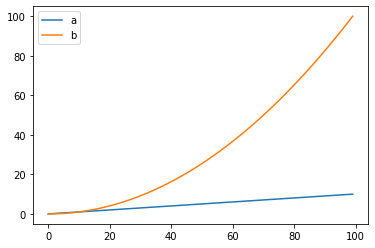

In [44]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = x**2
df = pd.DataFrame(np.array([x, y]).T, columns=["a", "b"])

df.plot()

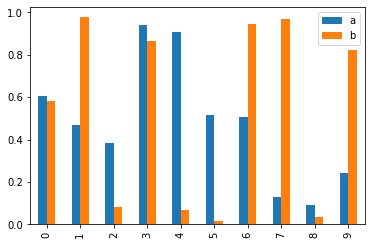

In [45]:
x = np.random.rand(10)
y = np.random.rand(10)
df = pd.DataFrame(np.array([x, y]).T, columns=["a", "b"])
df.plot.bar()

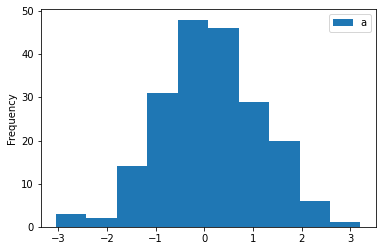

In [46]:
x = np.random.randn(200)
df = pd.DataFrame(x, columns=["a"])
df.plot.hist()

# Missing data with pandas 


Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

isnull()

notnull()

dropna()

fillna()

replace()


In [47]:
# Dictionary of lists
data = {
    "First Score": [100, 90, np.nan, 95],
    "Second Score": [30, 45, 56, np.nan],
    "Third Score": [np.nan, 40, 80, 98],
}

# Creating a dataframe from list
df = pd.DataFrame(data)

# Using isnull() function
df.isnull()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [48]:
data = {
    "First Score": [100, 90, np.nan, 95],
    "Second Score": [30, 45, 56, np.nan],
    "Third Score": [np.nan, 40, 80, 98],
}

# creating a dataframe using dictionary
df = pd.DataFrame(data)

# using notnull() function
df.notnull()

,First Score,Second Score,Third Score
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [49]:
data = {
    "First Score": [100, 90, np.nan, 95],
    "Second Score": [30, 45, 56, np.nan],
    "Third Score": [np.nan, 40, 80, 98],
}

# creating a dataframe from dictionary
df = pd.DataFrame(data)

# filling missing value using fillna()
df.fillna(0, inplace=True)
df

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [50]:
data = {
    "First_Score": [100, 90, 80, 95],
    "Second_Score": [30, 45, 56, 35],
    "Third_Score": [np.nan, 40, 80, 98],
}

# creating a dataframe from dictionary
df = pd.DataFrame(data)

# filling missing value using fillna()
df.Third_Score.fillna(int(df.Third_Score.mean()), inplace=True)
df

,First_Score,Second_Score,Third_Score
0,100,30,72.0
1,90,45,40.0
2,80,56,80.0
3,95,35,98.0


In [51]:
data = {
    "First_Score": [100, 90, 80, 95],
    "Second_Score": [30, 45, 56, 35],
    "Third_Score": [np.nan, 40, 80, 98],
}

# creating a dataframe from dictionary
df = pd.DataFrame(data)

# filling missing value using replace()
df.replace(to_replace=np.nan, value=-99, inplace=True)
df

,First_Score,Second_Score,Third_Score
0,100,30,-99.0
1,90,45,40.0
2,80,56,80.0
3,95,35,98.0


# Map 

`map()` function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple, DataFrame etc.)

In [52]:
# Lets create simple DataFrame
data = pd.DataFrame({'name':['ali', 'ahmed', 'ali','muntadher','hussein'],
                     'age':[20,30,30,25,20]})
data

,name,age
0,ali,20
1,ahmed,30
2,ali,30
3,muntadher,25
4,hussein,20


In [53]:
# Create function to normalize the age column 
def normlize_age(x):
    x = x/100
    return x
# apply the function on the age column using map function
data.age = data.age.map(normlize_age)
data

,name,age
0,ali,0.20
1,ahmed,0.30
2,ali,0.30
3,muntadher,0.25
4,hussein,0.20


# Factorize the Data

`factorize()` method helps to get the numeric representation of an array by identifying distinct values. This method is available as both pandas.

In [54]:
# Factorize the data
data.name.factorize()

(array([0, 1, 0, 2, 3]),
 Index(['ali', 'ahmed', 'muntadher', 'hussein'], dtype='object'))

In [55]:
data.name=data.name.factorize()[0]
data

,name,age
0,0,0.20
1,1,0.30
2,0,0.30
3,2,0.25
4,3,0.20


# Grouping and Sorting

**Introduction**

Maps allow us to transform data in a DataFrame or Series one value at a time for an entire column. However, often we want to group our data, and then do something specific to the group the data is in.

As you'll learn, we do this with the groupby() operation. We'll also cover some additional topics, such as more complex ways to index your DataFrames, along with how to sort your data.




In [58]:
# Read dataset 
dataset = pd.read_csv('/content/aug_train.csv')
# show the dataframe
dataset 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [69]:
cg = dataset.groupby(by='city')

groupby() created a group of citys which allotted the same  values. Then, for each of these groups, we grabbed the enrollee_id() column and counted how many times it appeared. counts() is just a shortcut to this groupby() operation.

We can use any of the summary functions we've used before with this data. For example, to get the cheapest wine in each point value category, we can do the following:

In [86]:
# get count of enrollee id
cg.enrollee_id.count()


city
city_1       26
city_10      86
city_100    275
city_101     75
city_102    304
           ... 
city_93      26
city_94      26
city_97     104
city_98      79
city_99      94
Name: enrollee_id, Length: 123, dtype: int64

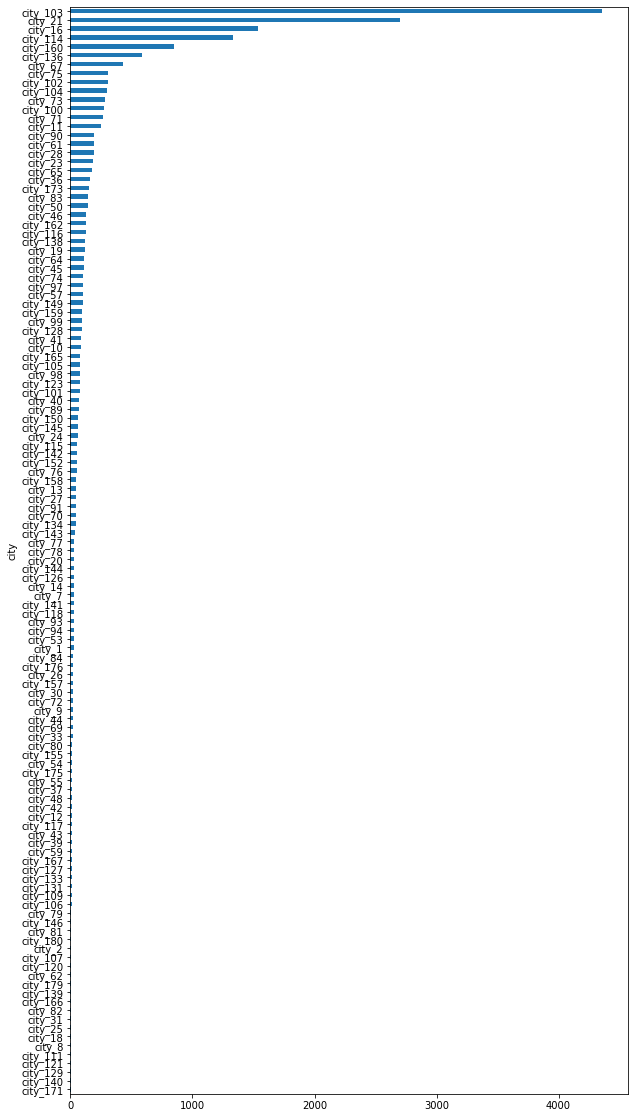

In [87]:
# plot the count of enrollee id
cg.enrollee_id.count().sort_values().plot.barh(figsize=(10,20))


In [89]:
cg['training_hours','target'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


training_hours                                                  \
                  count       mean        std  min    25%   50%     75%   
city                                                                      
city_1             26.0  59.653846  54.451404  3.0  14.75  37.0   75.00   
city_10            86.0  63.418605  60.659409  2.0  20.00  40.5   88.25   
city_100          275.0  66.163636  56.357230  3.0  23.00  49.0   95.00   
city_101           75.0  88.493333  74.155675  4.0  39.00  70.0  100.00   
city_102          304.0  69.677632  60.692712  2.0  25.00  53.0   92.00   
...                 ...        ...        ...  ...    ...   ...     ...   
city_93            26.0  70.807692  67.994129  4.0  25.50  45.0  110.75   
city_94            26.0  62.730769  55.840170  2.0  24.00  46.0   86.25   
city_97           104.0  72.182692  53.002979  5.0  34.00  57.0  105.25   
city_98            79.0  72.126582  67.550051  3.0  25.00  49.0   98.50   
city_99            94.0  61.734043  53.417040  4.0  25.00  47.0   84.75   

                target                                               
            max  count      mean       std  min  25%  50%  75%  max  
city                                                                 
city_1    194.0   26.0  0.115385  0.325813  0.0  0.0  0.0  0.0  1.0  
city_10   300.0   86.0  0.104651  0.307899  0.0  0.0  0.0  0.0  1.0  
city_100  324.0  275.0  0.236364  0.425623  0.0  0.0  0.0  0.0  1.0  
city_101  332.0   75.0  0.573333  0.497924  0.0  0.0  1.0  1.0  1.0  
city_102  330.0  304.0  0.171053  0.377176  0.0  0.0  0.0  0.0  1.0  
...         ...    ...       ...       ...  ...  ...  ...  ...  ...  
city_93   302.0   26.0  0.192308  0.401918  0.0  0.0  0.0  0.0  1.0  
city_94   238.0   26.0  0.384615  0.496139  0.0  0.0  0.0  1.0  1.0  
city_97   272.0  104.0  0.076923  0.267760  0.0  0.0  0.0  0.0  1.0  
city_98   306.0   79.0  0.101266  0.303608  0.0  0.0  0.0  0.0  1.0  
city_99   322.0   94.0  0.159574  0.368175  0.0  0.0  0.0  0.0  1.0  

[123 rows x 16 columns]

## Multi-indexes
In all of the examples we've seen thus far we've been working with DataFrame or Series objects with a single-label index. groupby() is slightly different in the fact that, depending on the operation we run, it will sometimes result in what is called a multi-index.

A multi-index differs from a regular index in that it has multiple levels. For example:

In [100]:
city_gender_group = dataset.groupby(['city','gender'])

In [139]:
city_gender_group.enrollee_id.count()

city     gender
city_1   Female     1
         Male      23
city_10  Female     3
         Male      64
         Other      5
                   ..
city_98  Male      58
         Other      3
city_99  Female    10
         Male      65
         Other      1
Name: enrollee_id, Length: 255, dtype: int64

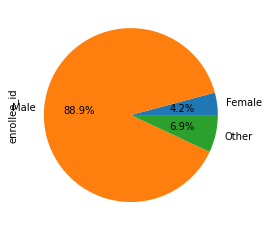

In [149]:
city_gender_group.enrollee_id.count()['city_10'].plot.pie(autopct='%1.1f%%',
        )

# Feature Correlation
What is correlation? Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

**What do correlation numbers mean?**

We describe correlations with a unit-free measure called the correlation coefficient which ranges from -1 to +1 and is denoted by r. Statistical significance is indicated with a p-value. Therefore, correlations are typically written with two key numbers: r = and p = .

1. The closer r is to zero, the weaker the linear relationship.

2. Positive r values indicate a positive correlation, where the values of both variables tend to increase together.

3. Negative r values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.
4. The p-value gives us evidence that we can meaningfully conclude that the population correlation coefficient is likely different from zero, based on what we observe from the sample.
5. "Unit-free measure" means that correlations exist on their own scale: in our example, the number given for r is not on the same scale as either elevation or temperature. This is different from other summary statistics. For instance, the mean of the elevation measurements is on the same scale as its variable.


Let’s get a closer look at what this means and how correlation can be useful. There are three types of correlations:

**Positive Correlation:** means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship.

**Negative Correlation:** means that if feature A increases then feature B decreases and vice versa.

**No Correlation:** No relationship between those two attributes.

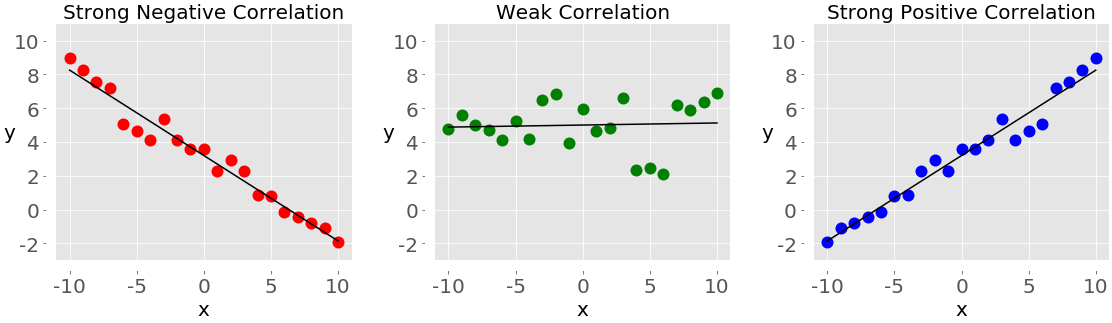

In [ ]:
dataset = pd.read_csv('/content/sample_data/california_housing_test.csv')
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000
